# Mini-projet Data Mining : Classification supervisée

## Importation des Packages nécessaires

In [1]:
# Import de la bibliothèque pandas pour la manipulation et l'analyse de données
import pandas as pd

# Import de la fonction scatter_matrix de pandas.plotting pour créer des graphiques de dispersion
from pandas.plotting import scatter_matrix

# Import de la bibliothèque matplotlib.pyplot pour la visualisation de données
import matplotlib.pyplot as plt

# Import de model_selection de scikit-learn pour les outils de sélection de modèles
from sklearn import model_selection

# Import de classification_report, confusion_matrix, et accuracy_score de scikit-learn.metrics
# pour évaluer les performances des modèles de classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import de DecisionTreeClassifier et KNeighborsClassifier de scikit-learn.tree
# et scikit-learn.neighbors respectivement, pour construire des modèles de classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import de seaborn pour la visualisation statistique, utilisant l'alias sns
import seaborn as sns


## Chargement de l'ensemble des données (Data set)

In [2]:
# URL du fichier CSV
url = "US_Adult_Income.csv"

# Noms des colonnes pour le dataset
noms_colonnes = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num' , 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country' , 'income']

# Lecture du fichier CSV dans un DataFrame à l'aide de pandas
dataset = pd.read_csv(url, names=noms_colonnes)


## Affichage de 10 premières instances de l’ensemble des données

In [3]:
# Utilisation de la méthode head() pour afficher les 10 premières lignes du DataFrame dataset
dataset.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
8,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
9,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


## Description et analyse des données

### Le volume (nombre total d’instances) et la dimension des données (nombre total des attributs)

In [4]:
# Calcul du nombre total d'instances dans le jeu de données
volume = len(dataset)  # Volume (nombre total d'instances)

# Calcul du nombre total d'attributs dans le jeu de données
dimension = dataset.shape[1]  # Dimension (nombre total des attributs)

# Affichage du volume (nombre total d'instances) dans le jeu de données
print("Volume :", volume)

# Affichage de la dimension (nombre total d'attributs) dans le jeu de données
print("Dimension :", dimension)

Volume : 48843
Dimension : 15


### Le type et le codage des attributs

In [5]:
# Types des attributs
types = dataset.dtypes

# Création d'un DataFrame avec les résultats
resultats_df = pd.DataFrame({'Attribut': types.index, 'Type de Codage': types.values})

# Affichage du tableau
print(resultats_df)


           Attribut Type de Codage
0               age         object
1         workclass         object
2            fnlwgt         object
3         education         object
4   educational-num         object
5    marital-status         object
6        occupation         object
7      relationship         object
8              race         object
9            gender         object
10     capital-gain         object
11     capital-loss         object
12   hours-per-week         object
13   native-country         object
14           income         object


### Quelques statistiques descriptives

In [6]:
#lecture de notre fichier CSV
df = pd.read_csv('US_Adult_Income.csv')
#Utilisation de la méthode describe() pour obtenir des statistiques descriptives
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Analyse et interprétation ses différentes valeurs

Les résultats obtenus présentent des statistiques descriptives pour différentes variables de notre jeu de données. Voici une analyse interprétative de ces résultats :

Age :

La moyenne d'âge est de 38.64 ans, avec une dispersion de 13.71 ans. L'âge varie de 17 à 90 ans, montrant une distribution relativement étendue.

Final Weight (fnlwgt) :

La moyenne du poids final est 189,664.1, avec une variation importante (écart-type de 105,604.0). Les valeurs s'étendent de 12,285 à 1,490,400.

Educational Number :

L'éducation moyenne est évaluée à 10.08, avec une variation de 1 à 16. Cela suggère une diversité éducative dans l'échantillon.

Capital Gain :

Le gain en capital moyen est de 1,079.07, mais avec une dispersion élevée (écart-type de 7,452.02). Certains individus ont un gain en capital significatif, comme indiqué par la valeur maximale de 99,999.

Capital Loss :

La perte en capital moyenne est de 87.50, avec une variabilité marquée (écart-type de 403.00). La plupart des individus semblent ne pas avoir de perte en capital significative, bien que la valeur maximale atteigne 4,356.

Hours Per Week :

En moyenne, les individus travaillent environ 40.42 heures par semaine, avec une dispersion de 12.39 heures. La plage s'étend de 1 à 99 heures.

## Visualisation des données

### Histogrammes

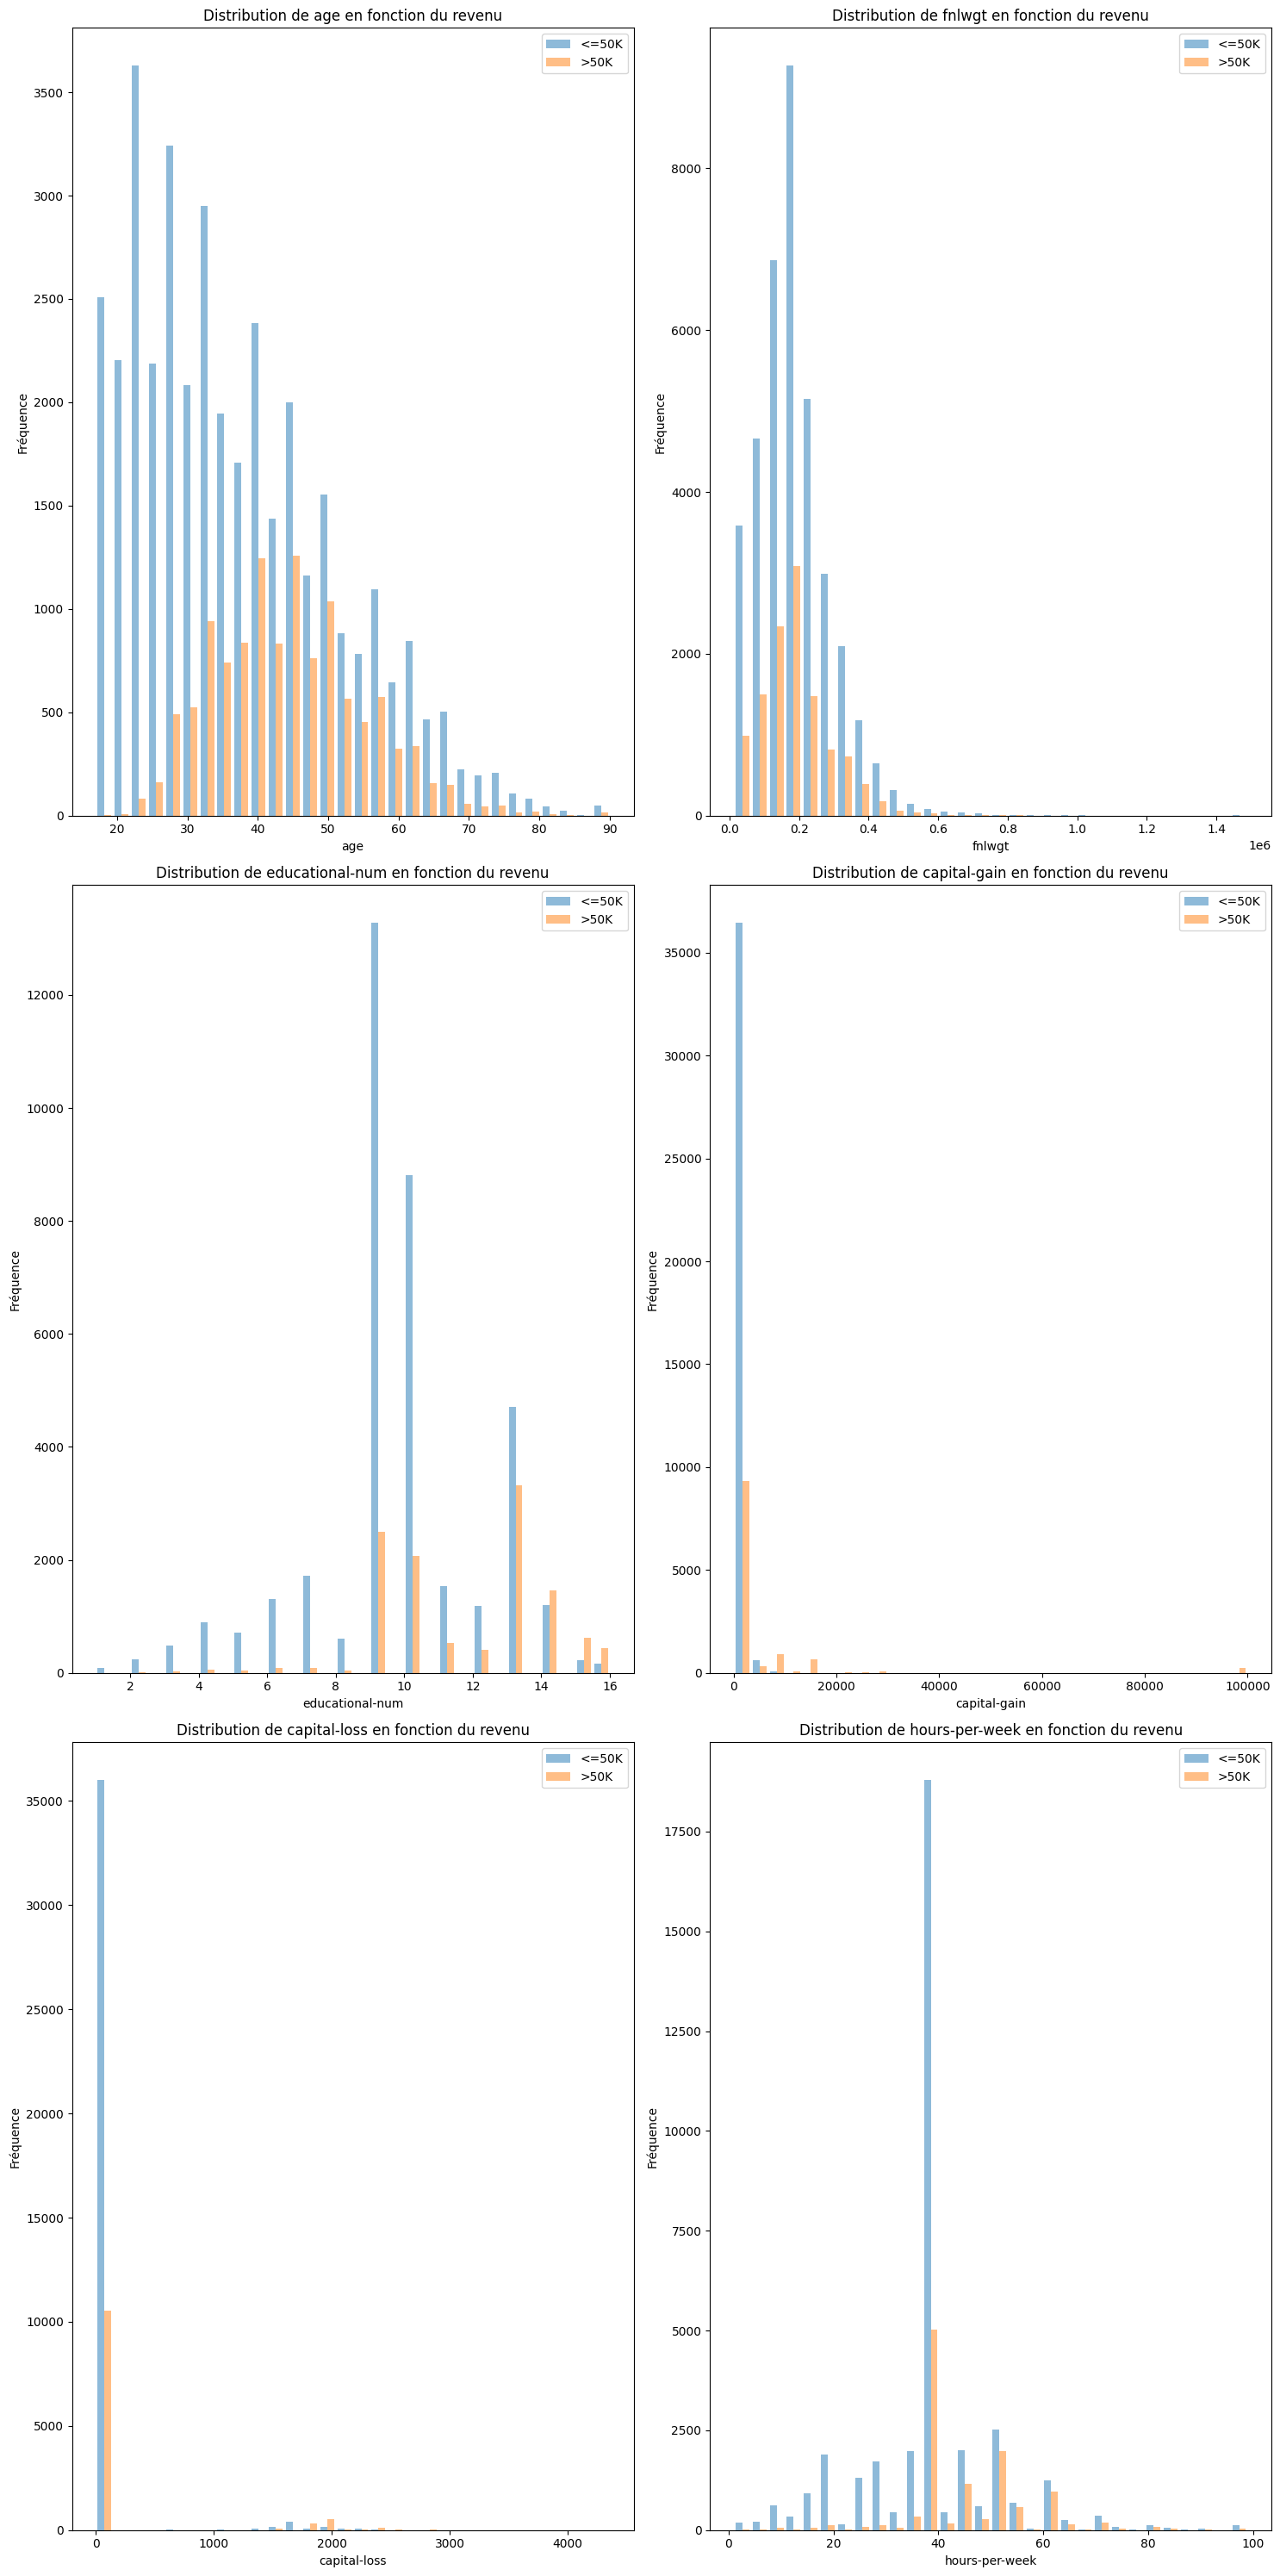

In [7]:
# Convertir les variables numériques
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Créer une figure de taille (15, 30) pour contenir les sous-graphiques
plt.figure(figsize=(15, 30))

# Boucler à travers chaque variable numérique
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    
    # Tracer l'histogramme pour la variable en fonction du revenu
    plt.hist([dataset[dataset['income'] == '<=50K'][column], dataset[dataset['income'] == '>50K'][column]], 
             bins=30, alpha=0.5, label=['<=50K', '>50K'])
    
    # Ajouter des étiquettes et des titres
    plt.title(f'Distribution de {column} en fonction du revenu')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.legend()

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()
plt.show()


### Nuages de points

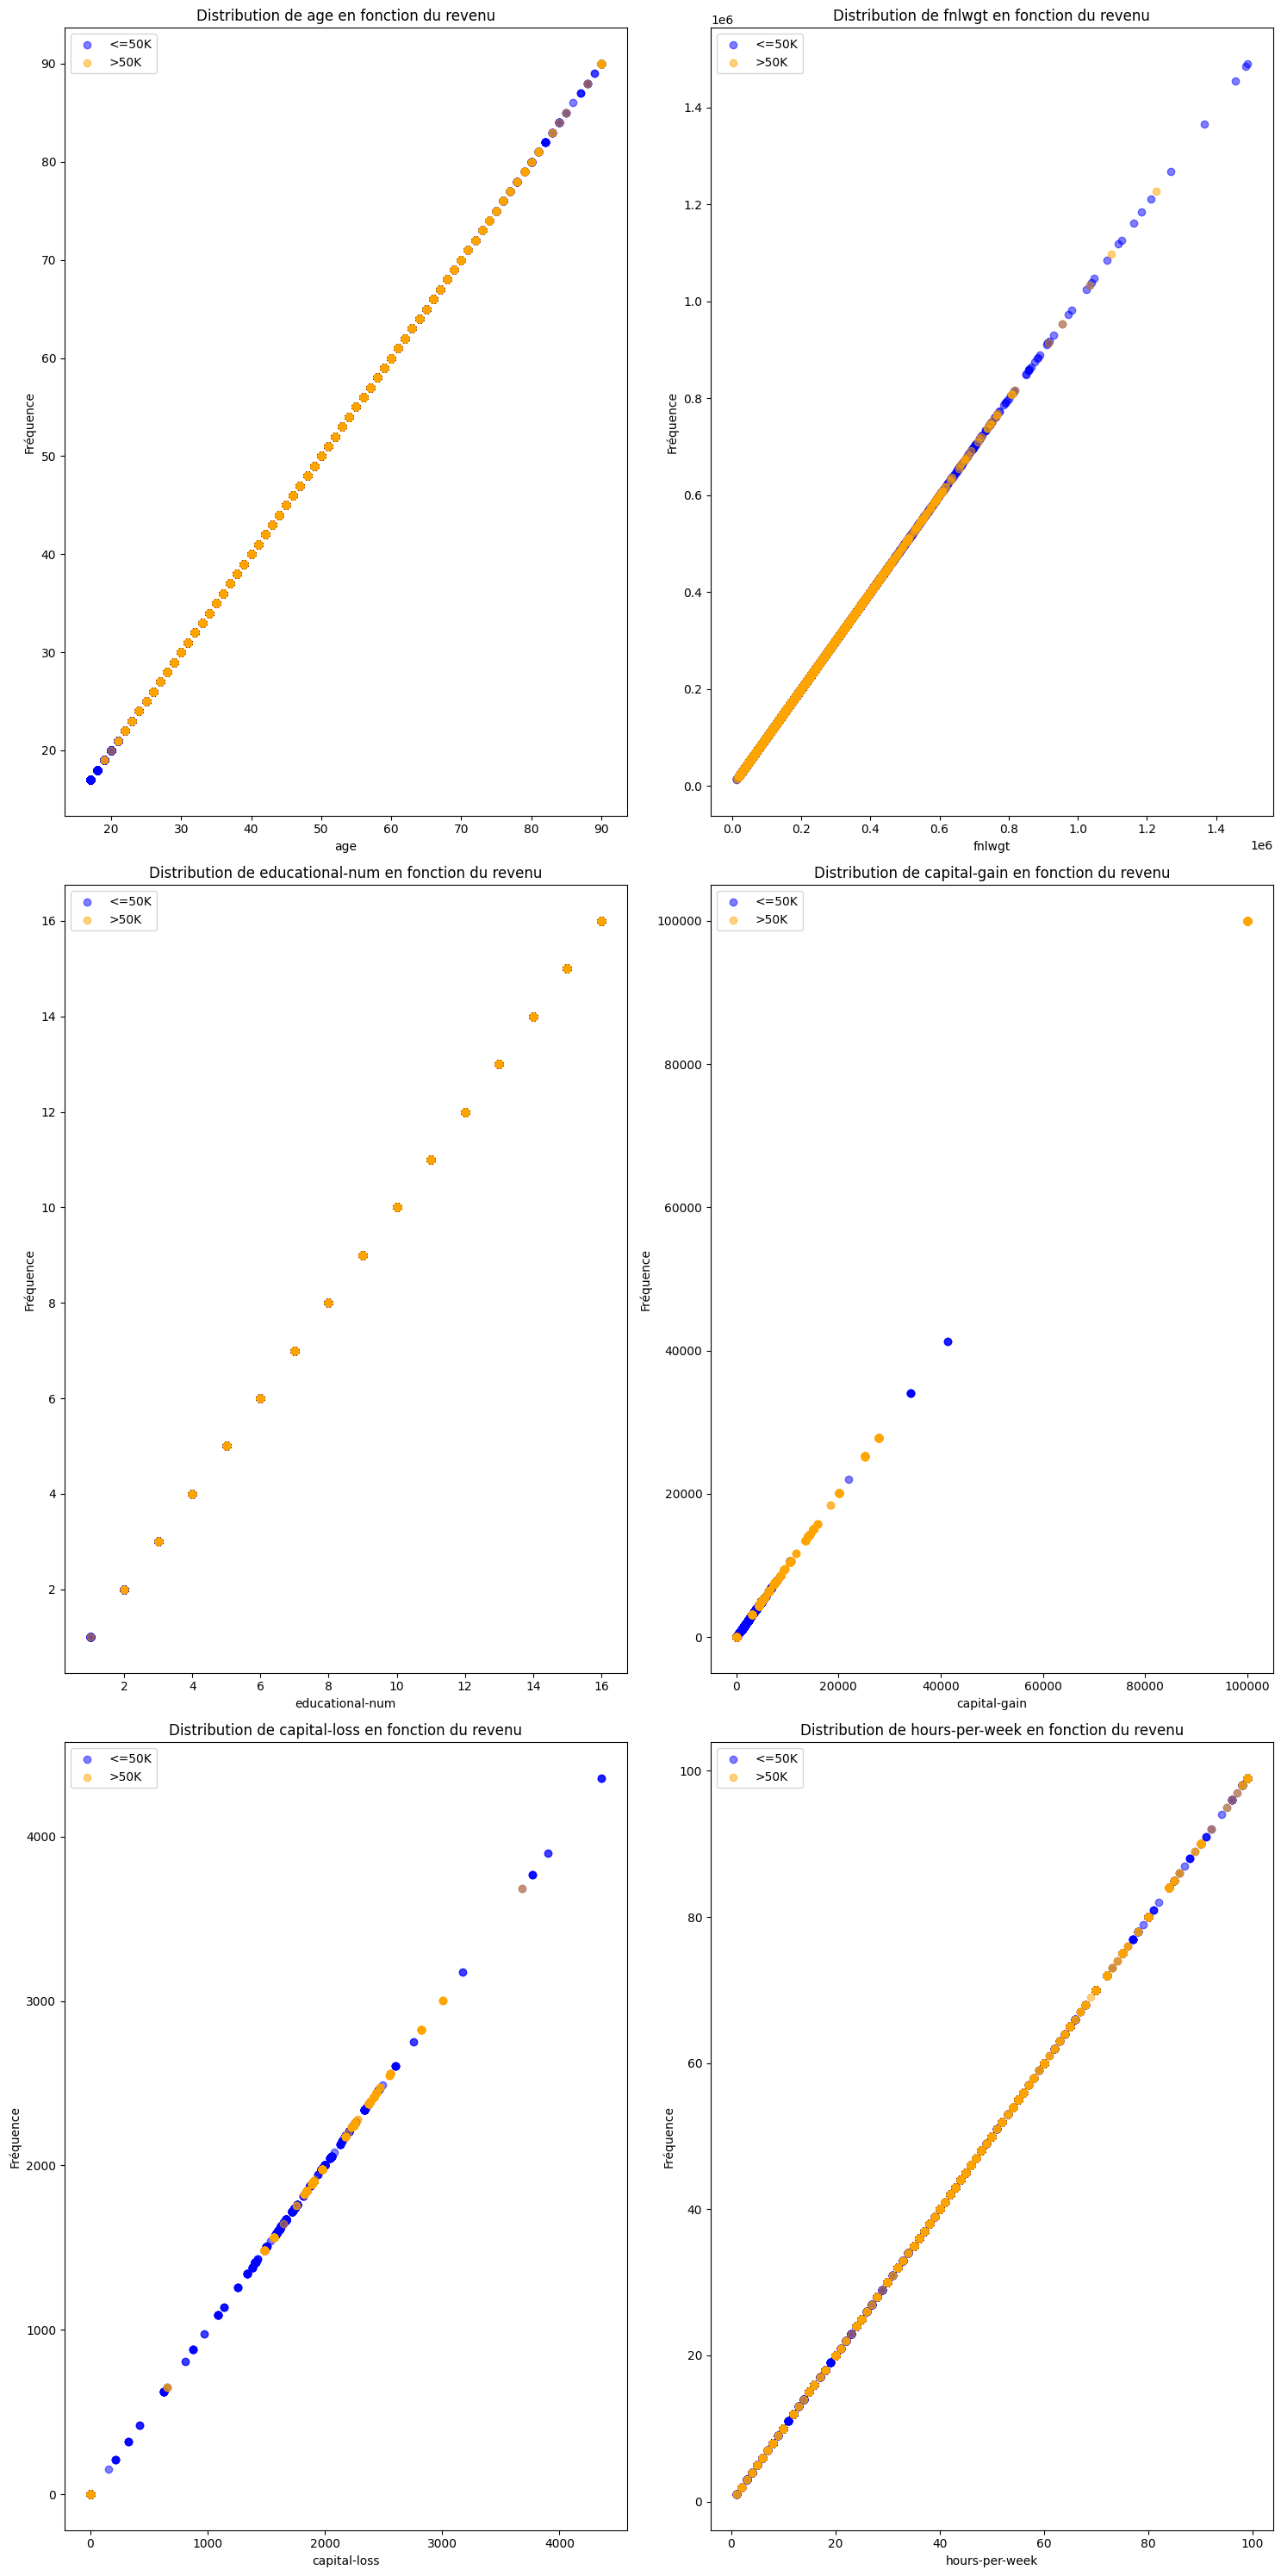

In [8]:
# Convertir les variables numériques
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Créer une figure de taille (15, 30) pour contenir les sous-graphiques
plt.figure(figsize=(15, 30))

# Boucler à travers chaque variable numérique
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    
    # Tracer le nuage de points pour la variable en fonction du revenu
    plt.scatter(dataset[dataset['income'] == '<=50K'][column], dataset[dataset['income'] == '<=50K'][column], 
                alpha=0.5, label='<=50K', color='blue')
    plt.scatter(dataset[dataset['income'] == '>50K'][column], dataset[dataset['income'] == '>50K'][column], 
                alpha=0.5, label='>50K', color='orange')
    
    # Ajouter des étiquettes et des titres
    plt.title(f'Distribution de {column} en fonction du revenu')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.legend()

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()
plt.show()

### Boîtes à moustaches

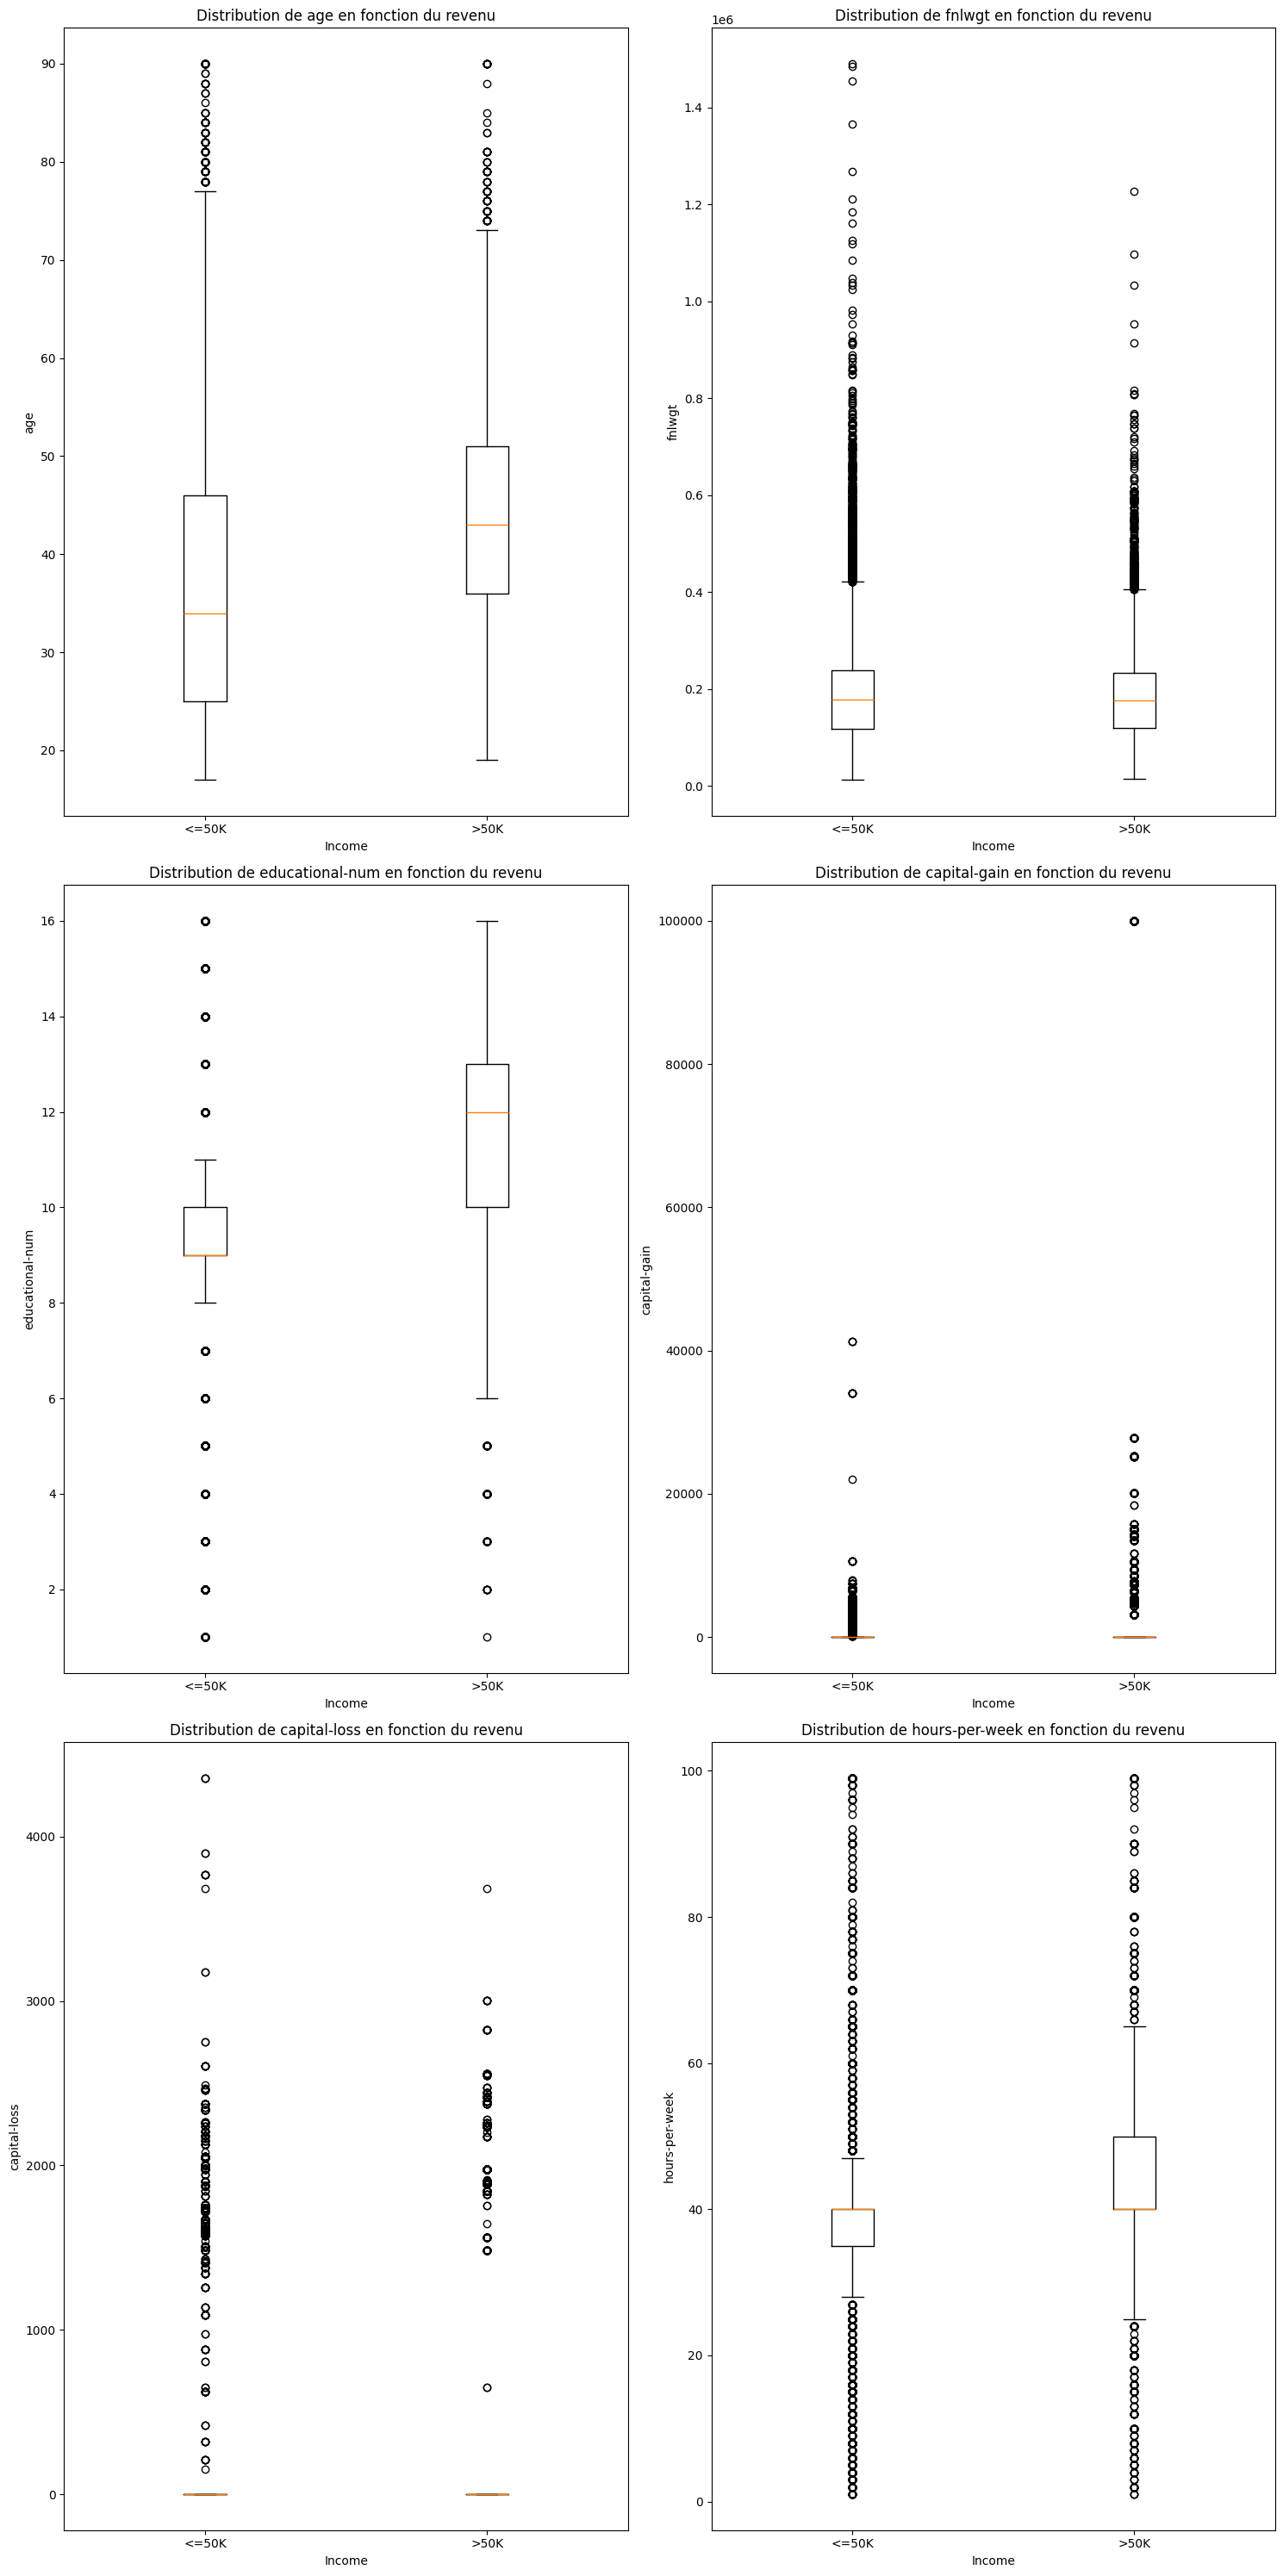

In [9]:
# Convertir les variables numériques
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Créer une figure de taille (15, 30) pour contenir les sous-graphiques
plt.figure(figsize=(15, 30))

# Boucler à travers chaque variable numérique
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    
    # Tracer la boîte à moustaches pour la variable en fonction du revenu
    plt.boxplot([dataset[dataset['income'] == '<=50K'][column], dataset[dataset['income'] == '>50K'][column]],
                labels=['<=50K', '>50K'])
    
    # Ajouter des étiquettes et des titres
    plt.title(f'Distribution de {column} en fonction du revenu')
    plt.xlabel('Income')
    plt.ylabel(column)

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()
plt.show()

## Nettoyage des	données

### Détection des valeurs manquantes

In [10]:
from prettytable import PrettyTable


# Create a table to store the results
result_table = PrettyTable()
result_table.field_names = ["Attribute", "Missing Values Count"]

# Now, iterate through the specified columns and check for missing values
target_value = "?"
columns_to_check = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 
                     'marital-status', 'occupation', 'relationship', 'race', 
                     'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 
                     'native-country', 'income']

for column in columns_to_check:
    # Remove leading and trailing whitespaces from the column names
    clean_column = column.strip()
    
    # Check if the cleaned column exists in the dataset
    if clean_column in dataset.columns:
        value_count = (dataset[clean_column] == target_value).sum()
        result_table.add_row([clean_column, value_count])
    else:
        result_table.add_row([clean_column, "Column not found"])

# Print the result table
print(result_table)

+-----------------+----------------------+
|    Attribute    | Missing Values Count |
+-----------------+----------------------+
|       age       |          0           |
|    workclass    |         2799         |
|      fnlwgt     |          0           |
|    education    |          0           |
| educational-num |          0           |
|  marital-status |          0           |
|    occupation   |         2809         |
|   relationship  |          0           |
|       race      |          0           |
|      gender     |          0           |
|   capital-gain  |          0           |
|   capital-loss  |          0           |
|  hours-per-week |          0           |
|  native-country |         857          |
|      income     |          0           |
+-----------------+----------------------+


### Technique de traitement des valeurs manquantes

On va utilisè la méthode de Remplacement par la Valeur la Plus Fréquente:

Pour traiter les valeurs manquantes dans le dataset, nous allons opter pour une approche simple et efficace. La méthode consiste à remplacer chaque valeur manquante par la valeur la plus fréquente présente dans la colonne correspondante.

Étapes à suivre :

Identification de la Valeur la Plus Fréquente :

Utiliser la fonction de mode pour déterminer la valeur la plus fréquente dans chaque colonne du dataset.

Appliquer le remplacement en parcourant chaque colonne et remplaçant les valeurs manquantes par la valeur la plus fréquente identifiée à l'étape précédente.

Vérifier le dataset après le remplacement pour confirmer que les valeurs manquantes ont été traitées avec succès.
Cette méthode présente l'avantage de maintenir la cohérence statistique des données tout en étant simple à mettre en œuvre.

#### Pour workclass

In [11]:
mode = dataset["workclass"].mode()[0]
print("La valeur la plus fréquente pour l'attribut workclass est :",mode)
dataset["workclass"] = dataset["workclass"].replace("?", mode)

La valeur la plus fréquente pour l'attribut workclass est : Private


#### Pour occupation

In [12]:
mode = dataset["occupation"].mode()[0]
print("La valeur la plus fréquente pour l'attribut occupation est :",mode)
dataset["occupation"] = dataset["occupation"].replace("?", mode)

La valeur la plus fréquente pour l'attribut occupation est : Prof-specialty


#### Pour native-country

In [13]:
mode = dataset["native-country"].mode()[0]
print("La valeur la plus fréquente pour l'attribut native-country est :",mode)
dataset["native-country"] = dataset["native-country"].replace("?", mode)

La valeur la plus fréquente pour l'attribut native-country est : United-States


### Affichage de l’ensemble des données apres le nettoyage

In [14]:
# Create a table to store the results
result_table = PrettyTable()
result_table.field_names = ["Attribute", "Missing Values Count"]

# Now, iterate through the specified columns and check for missing values
target_value = "?"
columns_to_check = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 
                     'marital-status', 'occupation', 'relationship', 'race', 
                     'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 
                     'native-country', 'income']

for column in columns_to_check:
    # Remove leading and trailing whitespaces from the column names
    clean_column = column.strip()
    
    # Check if the cleaned column exists in the dataset
    if clean_column in dataset.columns:
        value_count = (dataset[clean_column] == target_value).sum()
        result_table.add_row([clean_column, value_count])
    else:
        result_table.add_row([clean_column, "Column not found"])

# Print the result table
print(result_table)

+-----------------+----------------------+
|    Attribute    | Missing Values Count |
+-----------------+----------------------+
|       age       |          0           |
|    workclass    |          0           |
|      fnlwgt     |          0           |
|    education    |          0           |
| educational-num |          0           |
|  marital-status |          0           |
|    occupation   |          0           |
|   relationship  |          0           |
|       race      |          0           |
|      gender     |          0           |
|   capital-gain  |          0           |
|   capital-loss  |          0           |
|  hours-per-week |          0           |
|  native-country |          0           |
|      income     |          0           |
+-----------------+----------------------+


## Transformation	des	données

### Suppression d'attributs non pertinents

#### Calcul de corrélation entre 'income' et 'fnlwgt'

In [15]:
#Transformation du income en numerique
mapping = {">50K": 1, "<=50K": 0}
dataset["income"] = dataset["income"].map(mapping)

# Calculer la corrélation entre 'income' et 'fnlwgt'
correlation = dataset['income'].corr(dataset['fnlwgt'])

# Afficher le résultat
print(f"La corrélation entre 'income' et 'fnlwgt' est : {correlation}")


La corrélation entre 'income' et 'fnlwgt' est : -0.006338859530113211


La suppression de l'attribut 'fnlwgt' peut être justifiée par le fait que:

La corrélation entre 'income' et 'fnlwgt' est un nombre qui mesure la force et la direction de la relation linéaire entre ces deux variables. Dans ce cas, la corrélation est proche de zéro (-0.0063), ce qui suggère une faible corrélation linéaire entre 'income' et 'fnlwgt'.

Une corrélation proche de zéro indique qu'il n'y a pas de relation linéaire significative entre ces deux variables. La valeur négative suggère une tendance très légère à la baisse, mais la magnitude est si petite que cette relation est considérée comme négligeable.

En d'autres termes, les variations de 'fnlwgt' ne sont pas fortement associées aux variations de 'income' selon cette mesure de corrélation. Il est important de noter que la corrélation ne capture que les relations linéaires et peut ne pas rendre compte de relations non linéaires potentielles entre les variab

les.
Non Informatif pour la Prédiction du Revenu : L'attribut 'fnlwgt' (Final Weight) peut ne pas fournir d'informations significatives pour prédire le revenu d'un individu, car il représente essentiellement une correction statistique.


Simplification du Modèle : La suppression d'attributs non pertinents simplifie le modèle, facilitant ainsi l'interprétation et potentiellement améliorant les performances en éliminant le bruit inutile.

In [16]:
# Suppression d'attributs non pertinents
#  'fnlwgt' as non-discriminant
dataset.drop('fnlwgt', axis=1, inplace=True)

# Affichage de l'aperçu des données après suppression
dataset.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,NaN,workclass,education,NaN,marital-status,occupation,relationship,race,gender,NaN,NaN,NaN,native-country,NaN
1,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0.0
2,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0.0
3,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1.0
4,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1.0


### Suppression des donnees où l'age < 18 (age=17)

Puisque on souhaite prédire est-ce que le revenu annuel d’un adulte américain dépasse les 50 000$ on va supprimer les donnees où l'age < 18 car on a pas besoin de ces donnees

In [17]:
dataset = dataset[dataset['age'] >= 18]

#### Affichage des donnes apres suppression

In [18]:
dataset.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0.0
2,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0.0
3,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1.0
4,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1.0
5,18.0,Private,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,0.0


### Transformation des données catégorielles en données numériques et normalization si nécessaire

Justification de la normalisation pour Race, Relationship, Occupation, Marital Status, Education, Workclass: La normalisation garantit que chaque catégorie d'une variable a un impact équitable dans l'analyse, évitant ainsi que des catégories avec des échelles différentes ne biaisent les résultats.
Certains algorithmes d'apprentissage automatique sont sensibles à l'échelle des variables. La normalisation assure que toutes les variables se situent dans une plage commune, améliorant la stabilité et les performances des modèles.
La normalisation des fréquences en pourcentage dans les variables telles que race, relationship, occupation, marital-status, education, et workclass permet une comparaison directe des proportions, facilitant l'interprétation des résultats.

#### Pour workclass

In [19]:
#on va remplacer les données de la colonne workclass par la fréquence en pourcentage 
colonne = dataset["workclass"]

# Calcul de la fréquence de chaque valeur dans la colonne
frequences = colonne.value_counts(normalize=True)

# Remplacement des valeurs de la colonne par leur fréquence en pourcentage
dataset["workclass"] = colonne.map(frequences).round(4)


#### Pour education

In [20]:
#on va remplacer les données de la colonne education par la fréquence en pourcentage 
colonne = dataset["education"]

# Calcul de la fréquence de chaque valeur dans la colonne
frequences = colonne.value_counts(normalize=True)

# Remplacement des valeurs de la colonne par leur fréquence en pourcentage
dataset["education"] = colonne.map(frequences).round(4)

#### Pour marital-status

In [21]:
#on va remplacer les données de la colonne marital-status par la fréquence en pourcentage 
colonne = dataset["marital-status"]

# Calcul de la fréquence de chaque valeur dans la colonne
frequences = colonne.value_counts(normalize=True)

# Remplacement des valeurs de la colonne par leur fréquence en pourcentage
dataset["marital-status"] = colonne.map(frequences).round(4)

#### Pour occupation

In [22]:
#on va remplacer les données de la colonne occupation par la fréquence en pourcentage 
colonne = dataset["occupation"]

# Calcul de la fréquence de chaque valeur dans la colonne
frequences = colonne.value_counts(normalize=True)

# Remplacement des valeurs de la colonne par leur fréquence en pourcentage
dataset["occupation"] = colonne.map(frequences).round(4)

#### Pour relationship

In [23]:
#on va remplacer les données de la colonne relationship par la fréquence en pourcentage 
colonne = dataset["relationship"]

# Calcul de la fréquence de chaque valeur dans la colonne
frequences = colonne.value_counts(normalize=True)

# Remplacement des valeurs de la colonne par leur fréquence en pourcentage
dataset["relationship"] = colonne.map(frequences).round(4)

#### Pour race

In [24]:
#on va remplacer les données de la colonne race par la fréquence en pourcentage 
colonne = dataset["race"]

# Calcul de la fréquence de chaque valeur dans la colonne
frequences = colonne.value_counts(normalize=True)

# Remplacement des valeurs de la colonne par leur fréquence en pourcentage
dataset["race"] = colonne.map(frequences).round(4)

Raison de la non-normalisation : La variable de pays d'origine a été modifiée pour regrouper tous les pays autres que les États-Unis sous la catégorie 'Autre' et a ensuite été convertie en format numérique (1 pour États-Unis, 0 pour Autre). Cette transformation a déjà rendu la variable adaptée à l'analyse sans nécessiter de normalisation supplémentaire.

#### Pour native-country

In [25]:
# Aussi on s'interesse dans cettes etude par les donnees des aduls de l'USA, 
# donc on peut classer les autres pays dans une categorie 'Autre', puis on transforme l'attribut en format numerique
dataset.loc[(dataset['native-country'] == ' United-States'), 'native-country'] = 'United-States'
dataset.loc[(dataset['native-country'] != ' United-States'), 'native-country'] = 'Autre'

dataset.loc[(dataset['native-country'] == 'United-States'), 'native-country'] = int(1)
dataset.loc[(dataset['native-country'] == 'Autre'), 'native-country'] = int(0)

Raison de la non-normalisation : La normalisation n'est pas nécessaire pour la variable de genre car elle a déjà été convertie en valeurs binaires (1 pour masculin, 0 pour féminin). La normalisation est généralement utilisée pour mettre à l'échelle des variables continues, mais dans ce cas, la variable de genre est catégorique et a été traitée de manière appropriée.

#### Pour gender

In [26]:
mapping = {"Male": 1, "Female": 0}
dataset["gender"] = dataset["gender"].map(mapping)

Raison de la non-normalisation : La variable de revenu a été convertie en valeurs binaires (1 pour '>50K' et 0 pour '<=50K'). Comme il s'agit déjà d'une variable catégorique binaire, la normalisation n'est pas nécessaire dans ce contexte particulier.

#### Pour income

In [27]:
#deja convertit pour calculer la correlation entre income et fnlweight
#mapping = {">50K": 1, "<=50K": 0}
#dataset["income"] = dataset["income"].map(mapping)

### Affichage

In [28]:
display (dataset.head(10))

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,25.0,0.7494,0.0320,7.0,0.3218,0.0626,0.1460,0.0962,1,0.0,0.0,40.0,0,0.0
2,38.0,0.7494,0.3269,9.0,0.4638,0.0305,0.4086,0.8545,1,0.0,0.0,50.0,0,0.0
3,28.0,0.0646,0.0332,12.0,0.4638,0.0203,0.4086,0.8545,1,0.0,0.0,40.0,0,1.0
4,44.0,0.7494,0.2254,10.0,0.4638,0.0626,0.4086,0.0962,1,7688.0,0.0,40.0,0,1.0
5,18.0,0.7494,0.2254,10.0,0.3218,0.1838,0.1460,0.8545,0,0.0,0.0,30.0,0,0.0
6,34.0,0.7494,0.0247,6.0,0.3218,0.0982,0.2603,0.8545,1,0.0,0.0,30.0,0,0.0
7,29.0,0.7494,0.3269,9.0,0.3218,0.1838,0.1061,0.0962,1,0.0,0.0,40.0,0,0.0
8,63.0,0.0799,0.0173,15.0,0.4638,0.1838,0.4086,0.8545,1,3103.0,0.0,32.0,0,1.0
9,24.0,0.7494,0.2254,10.0,0.3218,0.0982,0.1061,0.8545,0,0.0,0.0,40.0,0,0.0
10,55.0,0.7494,0.0197,4.0,0.4638,0.1263,0.4086,0.8545,1,0.0,0.0,10.0,0,0.0


## Création	et	validation des modèles

### Étape 1 répartir l'ensemble des données en trois sous-ensembles :

In [29]:
from sklearn.model_selection import train_test_split

# X contient les attributs prédictifs, y contient la variable cible
X = dataset.drop('income', axis=1)
y = dataset['income']

# Répartition des données
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Explication et Interprétation :

Dans cette étape, nous avons utilisé la fonction train_test_split de scikit-learn pour diviser notre ensemble de données en trois parties distinctes. Cela nous permet d'avoir un ensemble d'apprentissage pour entraîner nos modèles, un ensemble de validation pour ajuster les hyperparamètres, et un ensemble de test pour évaluer les performances finales.

* **Ensemble d'apprentissage (Train):** Il est utilisé pour entraîner les modèles. Il comprend 70% des données initiales.
* **Ensemble de validation (Validation):** Il est utilisé pour ajuster (optimiser) les hyperparamètres des modèles. Il comprend 15% des données initiales.
* **Ensemble de test (Test):** Il est utilisé pour évaluer les performances finales des modèles. Il comprend également 15% des données initiales.

La séparation des données en ensembles d'apprentissage, de validation et de test est une pratique standard en apprentissage automatique. L'ensemble d'apprentissage est utilisé pour former les modèles, l'ensemble de validation est utilisé pour ajuster les hyperparamètres et l'ensemble de test est utilisé pour évaluer les performances finales. La séparation garantit que le modèle n'est pas surajusté (overfitting) aux données d'apprentissage et peut généraliser à de nouvelles données

### Étape 2 Ajuster les hyperparamètres des modèles avec GridSearchCV

#### KNN (KNeighborsClassifier) :

Dans cette étape, nous utilisons le modèle KNN (KNeighborsClassifier) et la technique de validation croisée GridSearchCV pour trouver les meilleurs hyperparamètres du modèle. Les hyperparamètres sont des paramètres du modèle qui ne sont pas appris à partir des données mais qui sont spécifiés avant l'apprentissage.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_param_grid = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3)
knn_grid.fit(X_train, y_train)

# Meilleurs paramètres pour le KNN
print("Meilleurs paramètres pour le KNN:", knn_grid.best_params_)

Meilleurs paramètres pour le KNN: {'metric': 'manhattan', 'n_neighbors': 7}


##### Explication et Interprétation :

Dans cette étape, nous avons utilisé **l'algorithme des k-plus proches voisins (KNN)** pour créer un modèle de classification. Cependant, il existe des hyperparamètres (paramètres du modèle qui ne sont pas appris à partir des données mais doivent être spécifiés avant l'entraînement) que nous devons ajuster pour obtenir de meilleures performances. Pour cela, nous avons utilisé la technique de recherche sur grille (GridSearchCV) avec une validation croisée à 3 plis **(cv=3)**.

Le code spécifie les hyperparamètres à tester pour le KNN dans knn_param_grid. On a choisi de tester différents nombres de voisins (n_neighbors: 3, 5, 7) et différentes mesures de distance (metric: euclidien, Manhattan). Le modèle KNN initial est créé avec les paramètres par défaut.

Ensuite, GridSearchCV recherche la meilleure combinaison d'hyperparamètres en évaluant les performances du modèle pour chaque combinaison dans la grille. Une fois la recherche terminée, les meilleurs paramètres sont affichés à l'aide de knn_grid.best_params_.

Dans ce cas, les meilleurs paramètres pour le KNN sont **{'metric': 'manhattan', 'n_neighbors': 7}**. Cela signifie que le modèle KNN a obtenu les meilleures performances lorsque la mesure de distance est la distance de **Manhattan** et le nombre de voisins est **7**.

### Arbres de Décision (DecisionTreeClassifier) :

Dans cette étape, nous utilisons le modèle Arbres de Décision (DecisionTreeClassifier) et la technique de validation croisée GridSearchCV pour trouver les meilleurs hyperparamètres du modèle. L'hyperparamètre en question ici est criterion, qui détermine la fonction qui mesure la qualité de découpage lors de la construction de l'arbre.

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_param_grid = {'criterion': ['entropy', 'gini']}
tree_model = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree_model, tree_param_grid, cv=3)
tree_grid.fit(X_train, y_train)

# Meilleurs paramètres pour les arbres de décision
print("Meilleurs paramètres pour les arbres de décision:", tree_grid.best_params_)

Meilleurs paramètres pour les arbres de décision: {'criterion': 'entropy'}


##### Explication et Interprétation :

Dans cette étape, nous avons utilisé l'algorithme **des Arbres de Décision** pour créer un modèle de classification. Comme pour le KNN, les Arbres de Décision ont des hyperparamètres que nous devons ajuster pour optimiser les performances du modèle. Nous avons utilisé la technique de recherche sur grille (GridSearchCV) avec une validation croisée à 3 plis (cv=3).

Le code spécifie les hyperparamètres à tester pour les Arbres de Décision dans tree_param_grid. Dans ce cas, les deux critères de mesure de qualité de découpage des arbres ('entropy' et 'gini') sont testés. Le modèle d'Arbres de Décision initial est créé avec les paramètres par défaut.

Ensuite, GridSearchCV recherche la meilleure combinaison d'hyperparamètres en évaluant les performances du modèle pour chaque combinaison dans la grille. Une fois la recherche terminée, les meilleurs paramètres sont affichés à l'aide de tree_grid.best_params_.

Dans ce cas, les meilleurs paramètres pour les Arbres de Décision sont **{'criterion': 'entropy'}**. Cela signifie que le modèle d'Arbres de Décision a obtenu les meilleures performances lorsque le critère de mesure de qualité de découpage est l'entropie.

### Réseaux de neurones multi-couches (MLPClassifier) :

In [32]:
from sklearn.neural_network import MLPClassifier

mlp_param_grid = {'activation': ['logistic', 'relu'],
                  'learning_rate_init': [0.001, 0.01, 0.1],
                  'max_iter': [100, 200, 300]}
mlp_model = MLPClassifier()
mlp_grid = GridSearchCV(mlp_model, mlp_param_grid, cv=3)
mlp_grid.fit(X_train, y_train)

# Meilleurs paramètres pour les réseaux de neurones multi-couches
print("Meilleurs paramètres pour les réseaux de neurones multi-couches:", mlp_grid.best_params_)

Meilleurs paramètres pour les réseaux de neurones multi-couches: {'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 200}


##### Explication et Interprétation :

Dans cette étape, nous avons utilisé **le modèle de Réseaux de Neurones Multi-Couches (MLP)** pour créer un modèle de classification. Tout comme pour le KNN et les Arbres de Décision, les réseaux de neurones ont des hyperparamètres que nous devons ajuster pour optimiser les performances du modèle. Nous avons utilisé la technique de recherche sur grille (GridSearchCV) avec une validation croisée à 3 plis (cv=3).

Le code spécifie les hyperparamètres à tester pour les Réseaux de Neurones Multi-Couches dans mlp_param_grid. Dans ce cas, les hyperparamètres comprennent la fonction d'activation **('logistic', 'relu')**, le taux d'apprentissage initial **('learning_rate_init': 0.001, 0.01, 0.1)**, et le nombre maximal d'itérations **('max_iter': 100, 200, 300)**. Le modèle MLP initial est créé avec les paramètres par défaut.

Ensuite, **GridSearchCV** recherche la meilleure combinaison d'hyperparamètres en évaluant les performances du modèle pour chaque combinaison dans la grille. Une fois la recherche terminée, les meilleurs paramètres sont affichés à l'aide de mlp_grid.best_params_.

Dans ce cas, les meilleurs paramètres pour les Réseaux de Neurones Multi-Couches sont **{'activation': 'relu', 'learning_rate_init': 0.01, 'max_iter': 200}**. Cela signifie que le modèle MLP a obtenu les meilleures performances avec une fonction d'activation de type ReLU, un taux d'apprentissage initial de **0.01** et un nombre maximal d'itérations de **200**.

### Étape 3 Comparer les performances des modèles :

In [33]:
from sklearn.metrics import accuracy_score

# Prédiction sur l'ensemble de validation
knn_val_pred = knn_grid.predict(X_val)
tree_val_pred = tree_grid.predict(X_val)
mlp_val_pred = mlp_grid.predict(X_val)

# Accuracy des modèles sur l'ensemble de validation
accuracy_knn = accuracy_score(y_val, knn_val_pred)
accuracy_tree = accuracy_score(y_val, tree_val_pred)
accuracy_mlp = accuracy_score(y_val, mlp_val_pred)

# Affichage des résultats
print("Accuracy KNN:", accuracy_knn)
print("Accuracy Arbres de Décision:", accuracy_tree)
print("Accuracy Réseaux de neurones multi-couches:", accuracy_mlp)

# Choix du meilleur modèle
best_model = max([(accuracy_knn, 'KNN'), (accuracy_tree, 'Arbres de Décision'), (accuracy_mlp, 'Réseaux de neurones multi-couches')])
print("Le meilleur modèle est:", best_model[1])

Accuracy KNN: 0.8388835152687578
Accuracy Arbres de Décision: 0.8176039795495371
Accuracy Réseaux de neurones multi-couches: 0.8171894431394224
Le meilleur modèle est: KNN


##### Explication et Interprétation :

Dans cette étape, nous avons évalué les performances des trois modèles (KNN, Arbres de Décision, Réseaux de Neurones Multi-Couches) sur l'ensemble de validation en utilisant la métrique de précision (Accuracy). La précision mesure la proportion d'observations correctement classées par le modèle.

Le code effectue les actions suivantes :

* Les prédictions sont faites sur l'ensemble de validation pour chacun des trois modèles (KNN, Arbres de Décision, Réseaux de Neurones Multi-Couches) à l'aide des meilleurs paramètres trouvés lors de l'ajustement des hyperparamètres.
* La précision de chaque modèle est calculée en comparant les prédictions avec les vraies étiquettes de l'ensemble de validation.
* Les résultats de précision sont affichés.
* Le modèle avec la plus grande précision est choisi comme meilleur modèle.

Dans les résultats :

* L'Accuracy pour le modèle KNN est de 0.8388.
* L'Accuracy pour le modèle Arbres de Décision est de 0.8176.
* L'Accuracy pour le modèle Réseaux de Neurones Multi-Couches est de 0.8171.

Le modèle **KNN** a la plus grande précision parmi les trois modèles testés, avec **une précision de 83.89%**. Par conséquent, le modèle **KNN** est choisi comme le meilleur modèle pour ce problème de classification sur l'ensemble de validation.

Cette étape est cruciale pour sélectionner le modèle qui semble généraliser le mieux aux données non vues.

#### Graphe qui montre le modele le plus performant

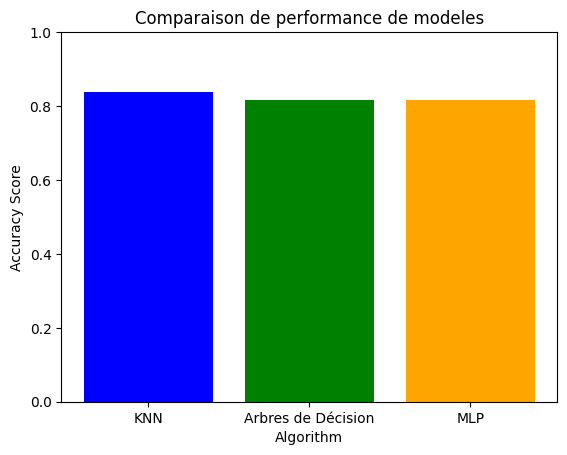

In [34]:
import matplotlib.pyplot as plt

# List of algorithm names
algorithms = ['KNN', 'Arbres de Décision', 'MLP']

# List of corresponding accuracy scores
accuracy_scores = [accuracy_knn, accuracy_tree, accuracy_mlp]

# Plotting the bar chart
plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Comparaison de performance de modeles')
plt.ylim(0.0, 1.0)  # Set the y-axis limit between 0 and 1 for accuracy scores
plt.show()

## Test du modèle

Accuracy sur l'ensemble de test pour le modèle KNN: 0.8443
Matrice de Confusion pour le modèle KNN:
[[5074  449]
 [ 678 1037]]


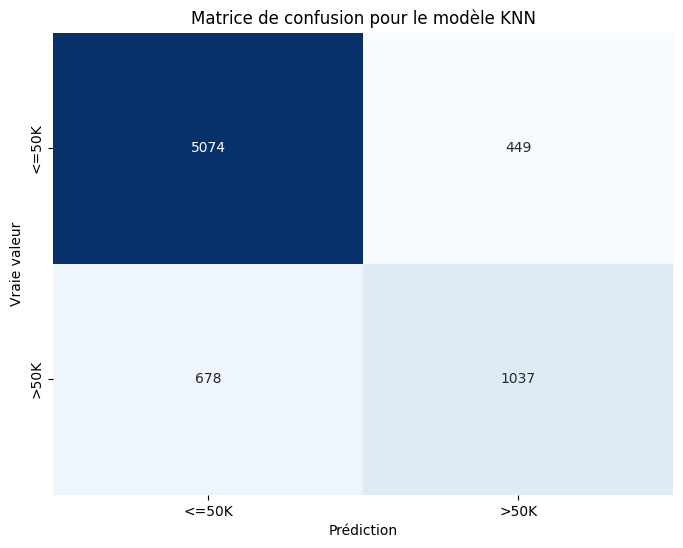

Rapport de Classification pour le modèle KNN:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      5523
         1.0       0.70      0.60      0.65      1715

    accuracy                           0.84      7238
   macro avg       0.79      0.76      0.77      7238
weighted avg       0.84      0.84      0.84      7238



In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prédiction sur l'ensemble de test pour le modèle KNN (le meilleur modèle)
knn_test_pred = knn_grid.predict(X_test)

# Accuracy sur l'ensemble de test
accuracy_test_knn = accuracy_score(y_test, knn_test_pred)
print(f'Accuracy sur l\'ensemble de test pour le modèle KNN: {accuracy_test_knn:.4f}')

# Matrice de confusion
conf_matrix_knn = confusion_matrix(y_test, knn_test_pred)
print('Matrice de Confusion pour le modèle KNN:')
print(conf_matrix_knn)

# Visualize the confusion matrix for the KNN model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.title('Matrice de confusion pour le modèle KNN')
plt.show()

# Rapport de classification (précision, rappel, F-score, support) pour le modèle KNN
class_report_knn = classification_report(y_test, knn_test_pred)
print('Rapport de Classification pour le modèle KNN:')
print(class_report_knn)

#### Explication et Interprétation :


Dans cette étape, nous avons testé le modèle KNN sur l'ensemble de test pour évaluer ses performances sur des données non vues. Les mesures de performance comprennent l'accuracy, la matrice de confusion et le rapport de classification.

Le code effectue les actions suivantes :

* **Calcul de l'accuracy :** L'accuracy est la proportion d'observations correctement classées par le modèle sur l'ensemble de test. Dans ce cas, l'accuracy est de 0.8443, ce qui signifie que le modèle a correctement classé environ 84.43% des échantillons de l'ensemble de test.
* **Matrice de Confusion :** La matrice de confusion montre le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs. Dans votre cas, la matrice de confusion est affichée comme suit :
  * 5074 vrais négatifs (TN)
  * 1037 vrais positifs (TP)
  * 449 faux positifs (FP)
  * 678 faux négatifs (FN)
* **Visualisation de la Matrice de Confusion :** La matrice de confusion est également visualisée sous forme de heatmap pour une meilleure compréhension. La couleur et les chiffres annotés sur la heatmap représentent les différentes parties de la matrice de confusion.
* **Rapport de Classification :** Le rapport de classification fournit des mesures détaillées telles que la précision, le rappel, le F-score et le support pour chaque classe (0 et 1) ainsi que des moyennes macro et pondérées. Ces métriques sont calculées en comparant les prédictions du modèle avec les vraies étiquettes de l'ensemble de test.
  * **Precision :** La proportion d'échantillons positifs correctement prédits par le modèle. Par exemple, pour la classe 0, la précision est de 0.88, ce qui signifie que parmi les échantillons que le modèle a prédits comme appartenant à la classe 0, 88% étaient effectivement de la classe 0.
  * **Recall :** La proportion d'échantillons positifs réels correctement prédits par le modèle. Par exemple, pour la classe 0, le rappel est de 0.92, ce qui signifie que parmi tous les échantillons réels de la classe 0, le modèle en a correctement prédit 92%.
  * **F1-score :** Une moyenne pondérée de la précision et du rappel. Il combine ces deux mesures en un seul nombre.
  * **Support :** Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.
 

En résumé, l'ensemble de test montre une accuracy de 84.43%, avec des résultats plus détaillés fournis par la matrice de confusion et le rapport de classification. Ces mesures permettent d'évaluer la performance du modèle sur des données qu'il n'a pas vu lors de l'entraînement. Vous pouvez souligner que l'accuracy seule peut ne pas donner une image complète, d'où l'importance d'utiliser des métriques supplémentaires pour évaluer la peformance du modèle.
formance du modèle.
nt les instances '>50K'.

# Réalisé par :
## ABKADRI AMINE
## ZAIDI MOUAD